# Student Performance Indicator

### Life Cycle of This Project:

- Understanding the Problem Statement
- Data Collection
- Perform Data Checks
- Exploratory Data Analysis
- Data Preprocessing
- Model Training
- Choosing Best Performing Model

### 1. Problem Statement
The goal of this project is to understand the influence of the parents background, test preparation, and various other variables on the students performance. 

### 2. Data Collection
- Data Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download

- The dataset is designed for data science training and is fictional. It includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them.

- Consists of 8 columns and 1000 rows.

### 2.1 Import Necessary Libraries

#### Importing Pandas Numpy Matplotlib Seaborn and Warnings Library

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt  
import matplotlib_inline 
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas Dataframe


In [5]:
df=pd.read_csv('data/StudentsPerformance.csv')

#### Show top 5 Records

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the Dataset

In [7]:
df.shape

(1000, 8)

### 2.3 Dataset Information

- Gender: Sex of a student (Male/Female)
- Race/ethnicity: Ethnicity of a student (Group A,B,C,D,E)
- Parental level of education : parents' final education (bachelor's degree,some college,master's degree,associate's degree,high school)
- Lunch : having lunch before test (standard or free/reduced)
- Test preparation course : complete or not complete before test
- Math score
- Reading score
- Writing score

### 3. Perform Data Checks

- Check Missing values
- Check Duplicates
- Check Datatypes
- Check the number of unique values in each column
- Check statistics of the  dataset
- Check various categories present in the different categorical column

#### 3.1 Checking Missing Values

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There are no missing values in dataset

#### 3.2 Checking Duplicate Values

In [9]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicate values in this dataset. If there were any, we would drop them using df.drop_duplicates()

#### 3.3 Checking the datatypes of columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4Checking the number of unique values of each column

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5 Checking statistics of the dataset.

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights from the statistics:
- The students' average performance on all three courses is similar. The mean of all three courses is close and between 66 and 68.1

- The standard deviation is also very close of all three courses.

- Reading score has the highest minimum of 17

#### 3.6 Checking various categories in each column.

In [13]:
for col in df.columns:
    if col not in ['math score','reading score','writing score']:
        print(f'Categories in {col} : {df[col].unique()}')

Categories in gender : ['female' 'male']
Categories in race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch : ['standard' 'free/reduced']
Categories in test preparation course : ['none' 'completed']


In [14]:
# define numerical and categorical columns 
numeric_feature=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']
# print columns
print('We have {} numerical features : {}'.format(len(numeric_feature),numeric_feature))
print('\nWe have {} categorical features : {}'.format(len(categorical_feature),categorical_feature))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### 3.7Adding columns for total score and average

In [15]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total_score']/3 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()

print(f'Number of students with full marks in Maths : {math_full}')     
print(f'Number of students with full marks in Writing : {writing_full}')     
print(f'Number of students with full marks in Reading : {reading_full}')     

Number of students with full marks in Maths : 7
Number of students with full marks in Writing : 14
Number of students with full marks in Reading : 17


In [17]:
reading_less_20=df[df['reading score']<=20]['average'].count()
writing_less_20=df[df['writing score']<=20]['average'].count()
math_less_20=df[df['math score']<=20]['average'].count()

print(f'Number of students with less than 20 marks in Maths : {math_less_20}')     
print(f'Number of students with less than 20 marks in Writing : {writing_less_20}')     
print(f'Number of students with less than 20 marks in Reading : {reading_less_20}')     

Number of students with less than 20 marks in Maths : 4
Number of students with less than 20 marks in Writing : 3
Number of students with less than 20 marks in Reading : 1


## 4.Exploring Data (Visualization)

#### 4.1 Visualizing Data

Let us visualize average score distribution and make some conclusions.

- Histogram
- Kernel Distribution Function

#### 4.1.1 Histogram and KDE


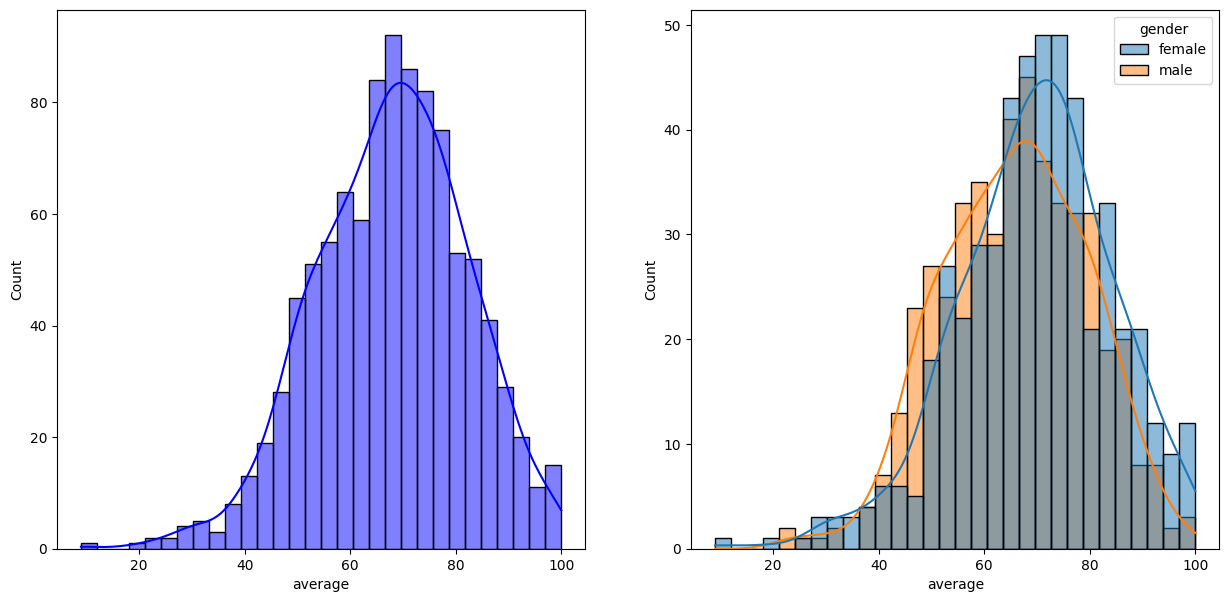

In [18]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender');

### Insights

#### Female students tend to perform well then male students 

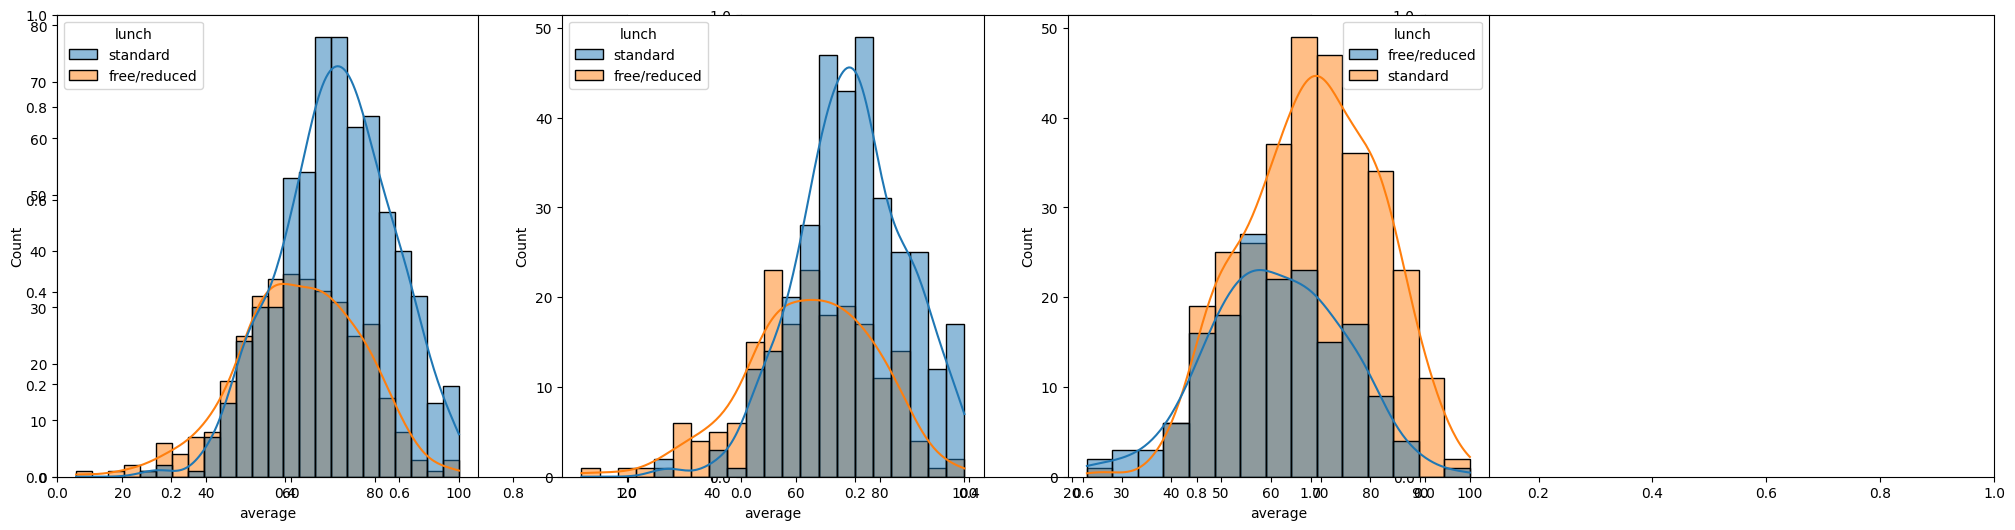

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch');
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch');

[]

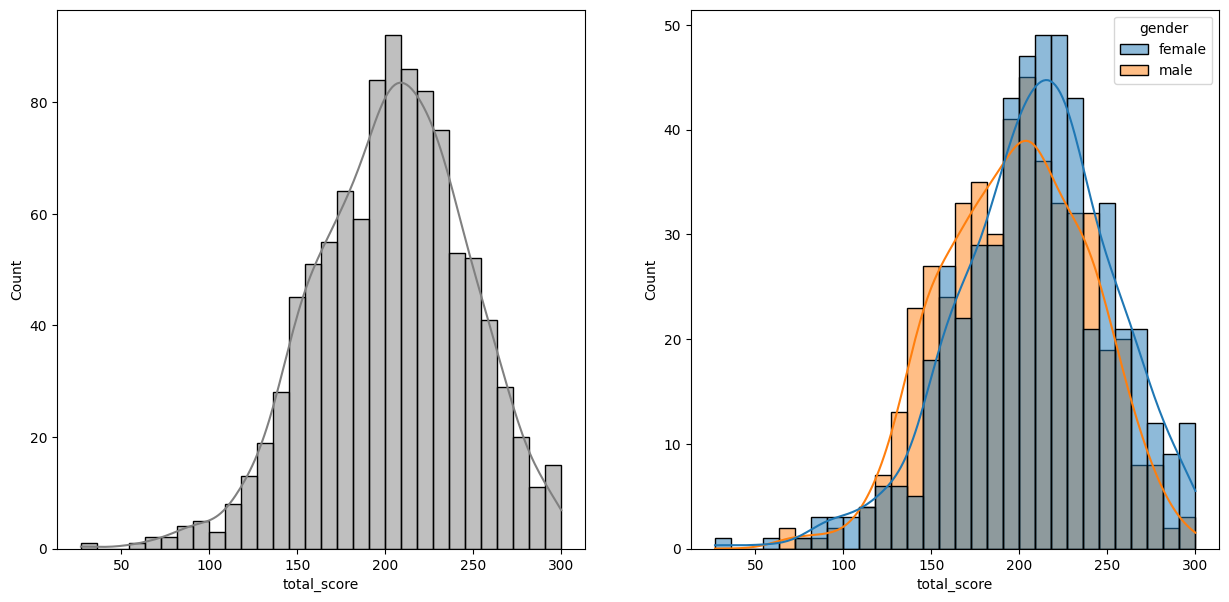

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='grey')
plt.subplot(122)
sns.histplot(data=df, x='total_score', bins=30, kde=True, hue='gender')
plt.plot()

- The majority of students have a total score that is between ~ 180 and 240.
- We can see in the second graph that more females have gotten higher total scores than boys.

- Female students tend to perform better overall compared to male students in this case.

#### Math score distribution based on gender

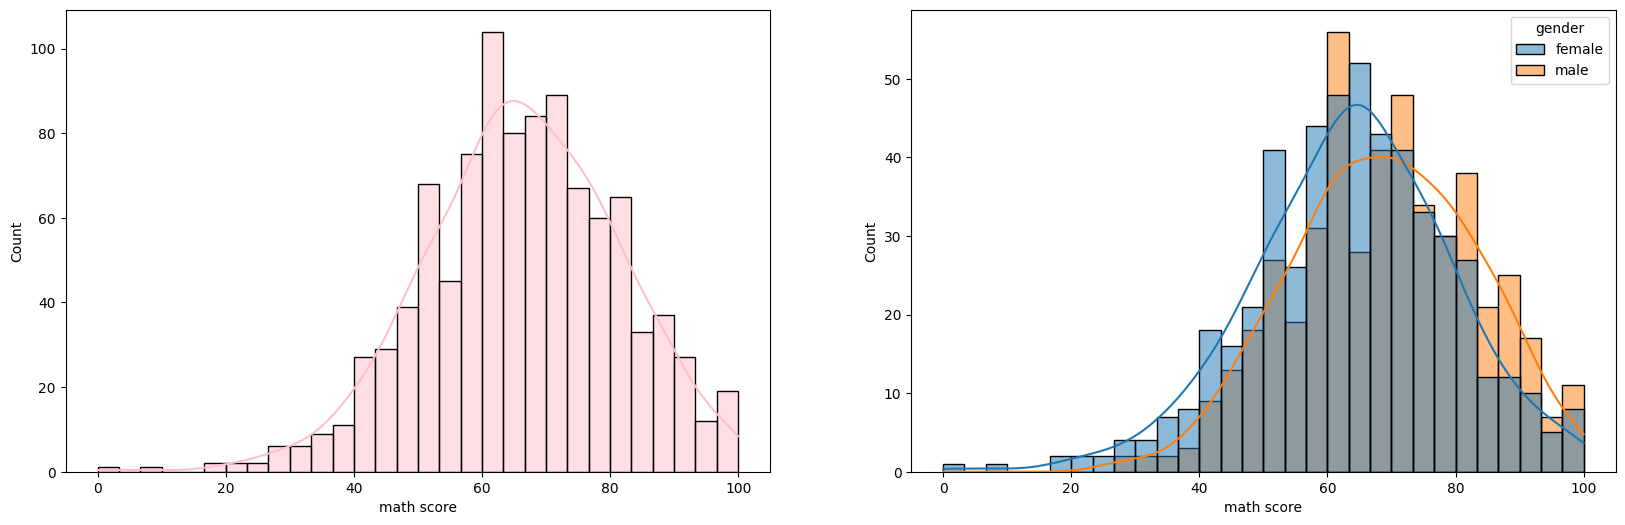

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plt.subplot(121)
sns.histplot(data=df, x='math score', bins=30, kde=True, color='pink')
plt.subplot(122)
sns.histplot(data=df, x='math score', bins=30, kde=True, hue='gender')
plt.plot();

#### In terms of math score, males have performed better compared to females.

#### Let us now see the average score distribution based on the variable lunch.

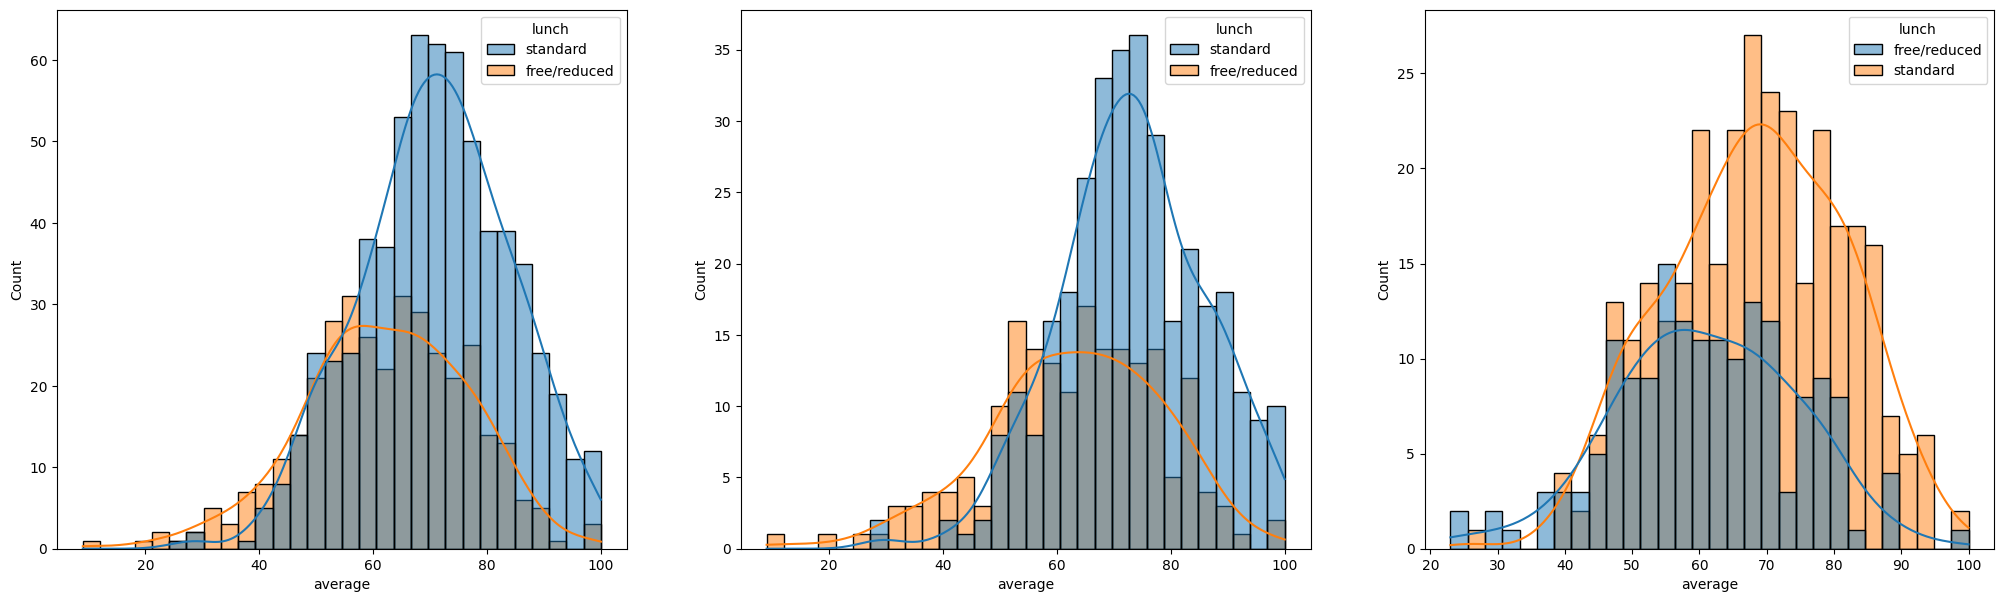

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(25, 7))
plt.subplot(131)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='average', bins=30, kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'],
             x='average', bins=30, kde=True, hue='lunch')
plt.show()

Insights:
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

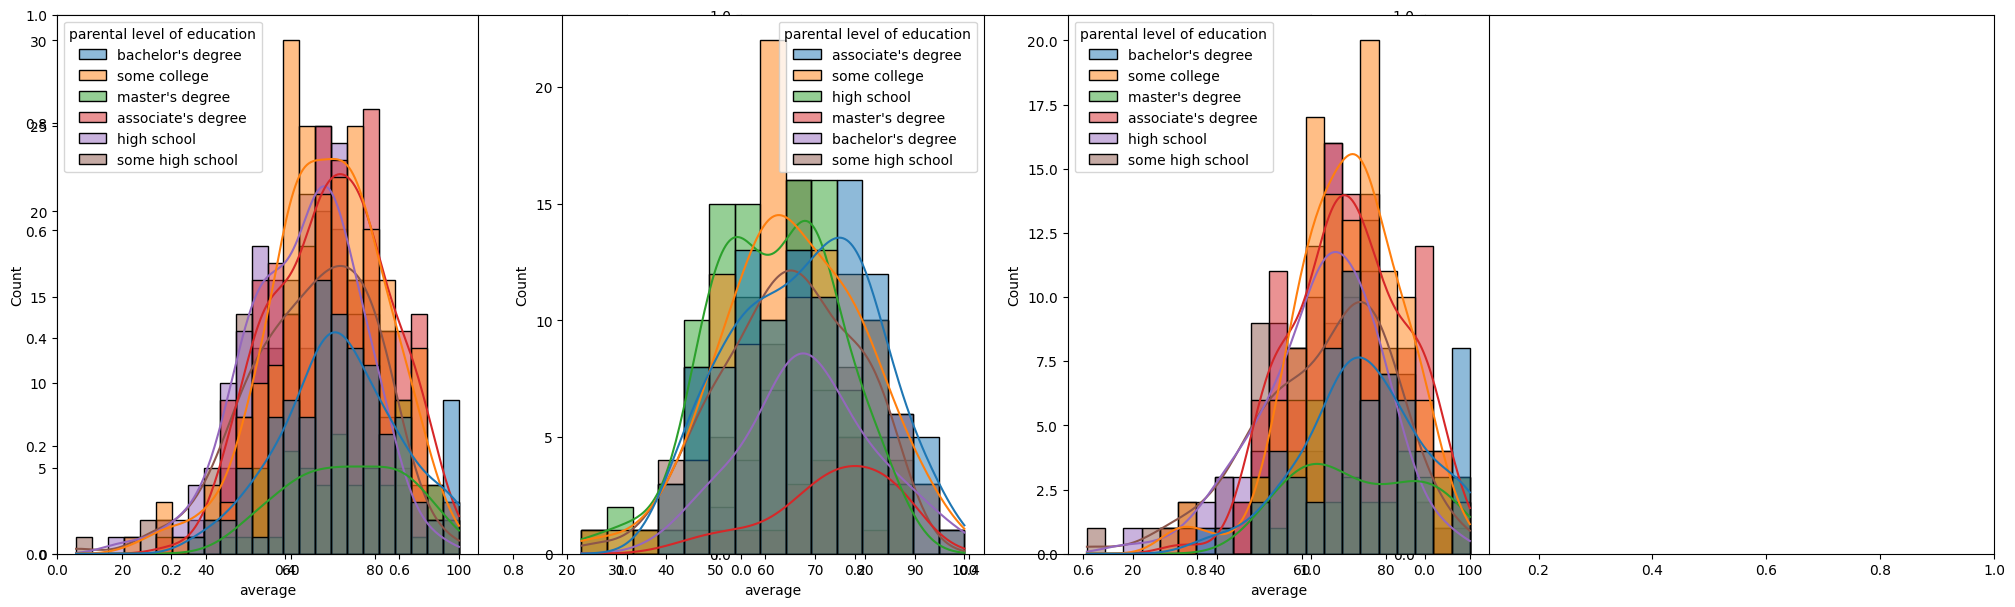

In [23]:
plt.subplots(1, 3, figsize=(25, 7))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True,
                  hue='parental level of education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'male'], x='average',
                  kde=True, hue='parental level of education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'female'], x='average',
                  kde=True, hue='parental level of education')
plt.show()

Insights:
- Group E and D tends to perform better than other groups regardless of the sex.
- Group A and B tend to perform poorly irrespective of their gender.

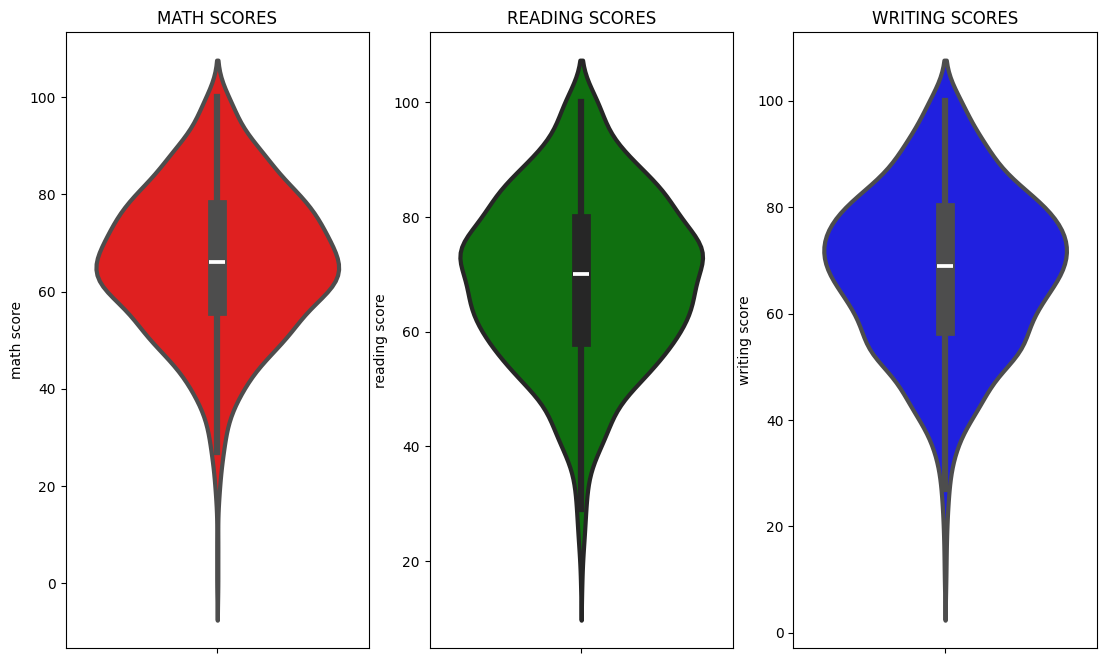

In [24]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2) 
plt.title('READING SCORES')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)
plt.show()

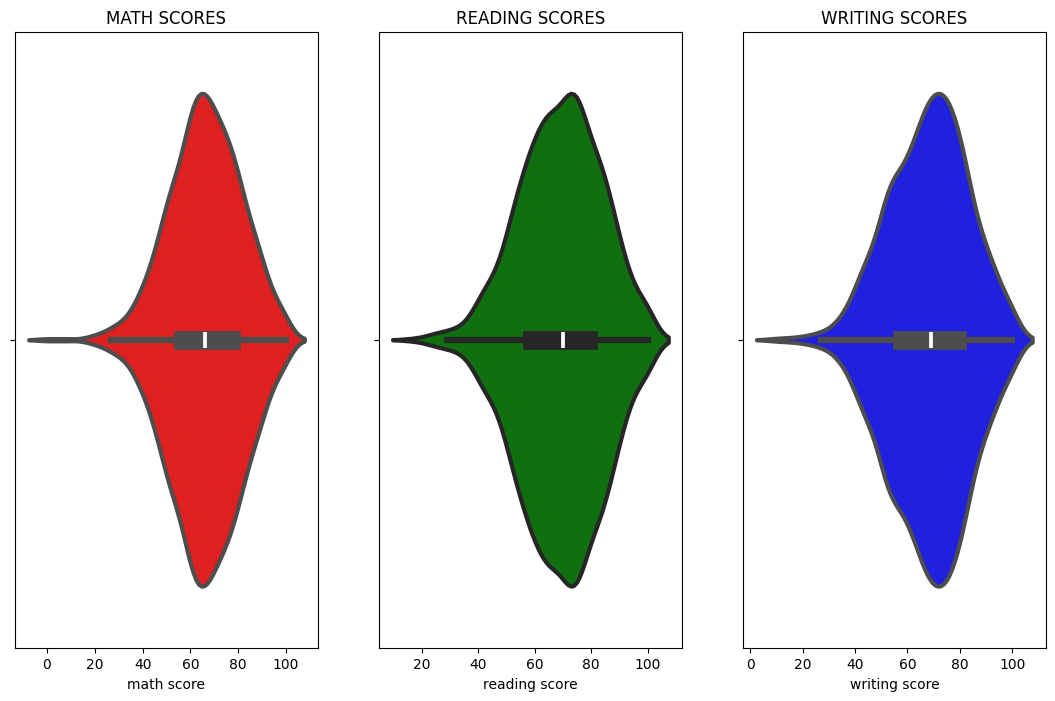

In [25]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(x='math score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(x='reading score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(x='writing score', data=df, color='blue', linewidth=3)
plt.show()


Insights:
- Most of the students have scores in between 60 and 80 in maths.
- Most of the students have scores in between 50 and 80 in reading and writing.

#### 4.1 Multivariate Analysis

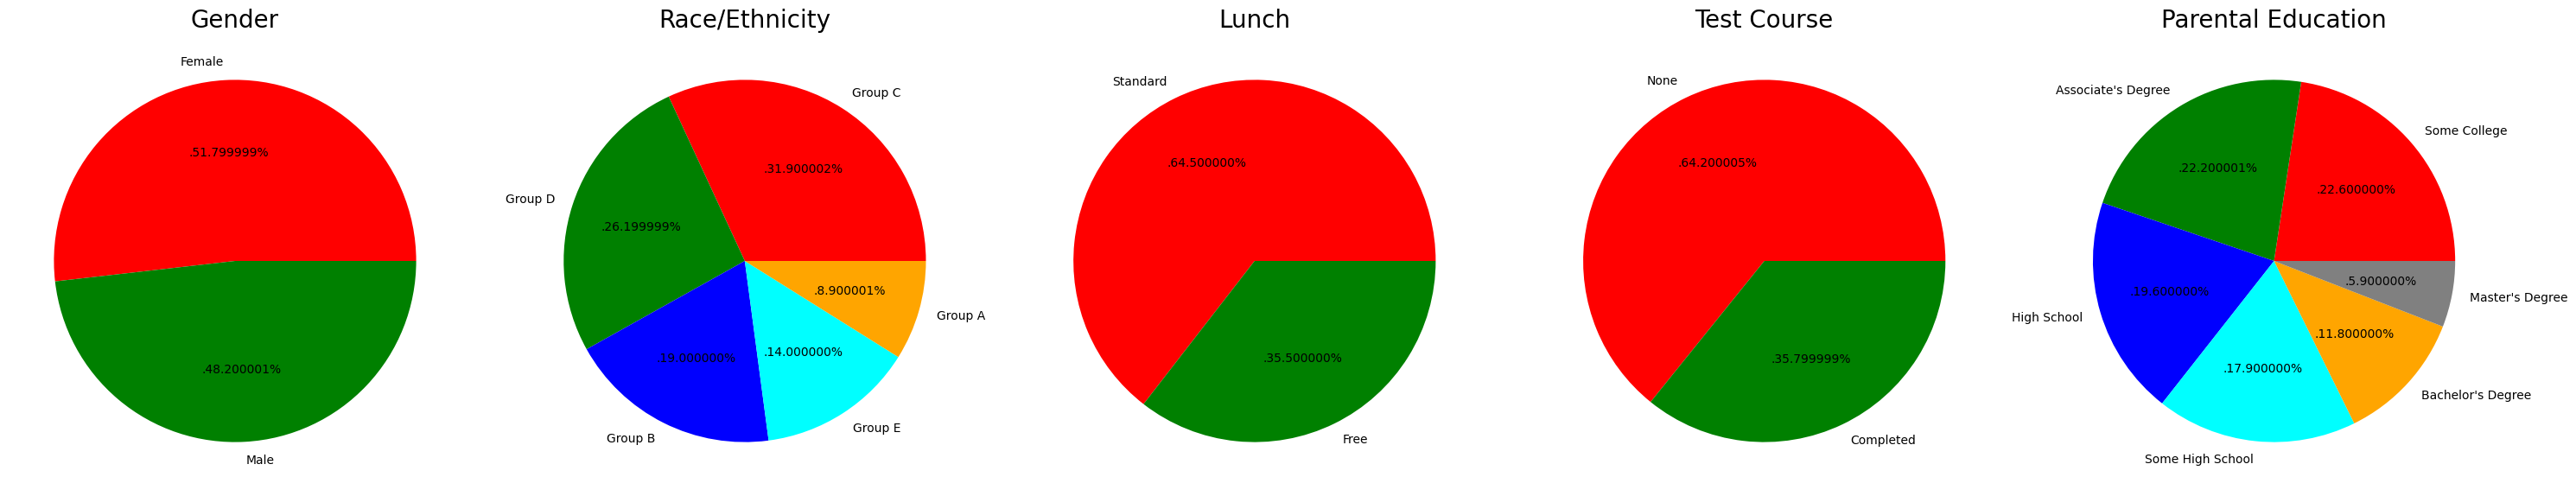

In [26]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

Insights:
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.2 Feature Wise Visualization

GENDER COLUMN
- How is distribution of Gender ?
- Does gender have any impact on student's performance ?

#### Univariate Analysis (Gender Column)

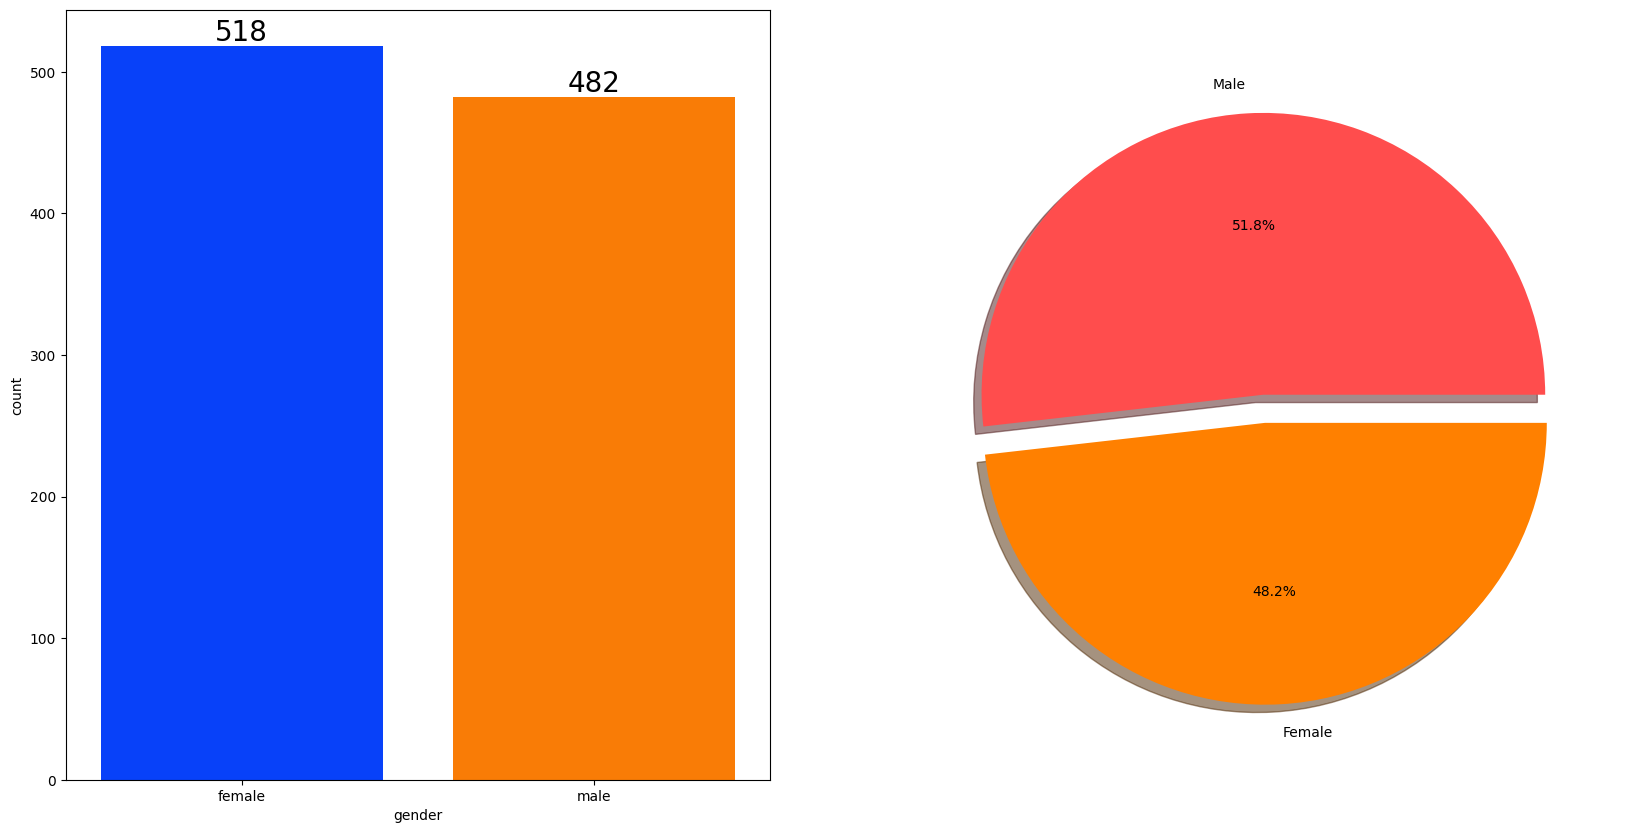

In [27]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['gender'], data=df, palette='bright',
              ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[
        0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
plt.show()

#### BIVARIATE ANALYSIS ( Does gender have any impact on student's performance ? )

Insights:
- The Females have outperformed males in terms of overall score.
- However, males have performed better in terms of math scores compared to females.

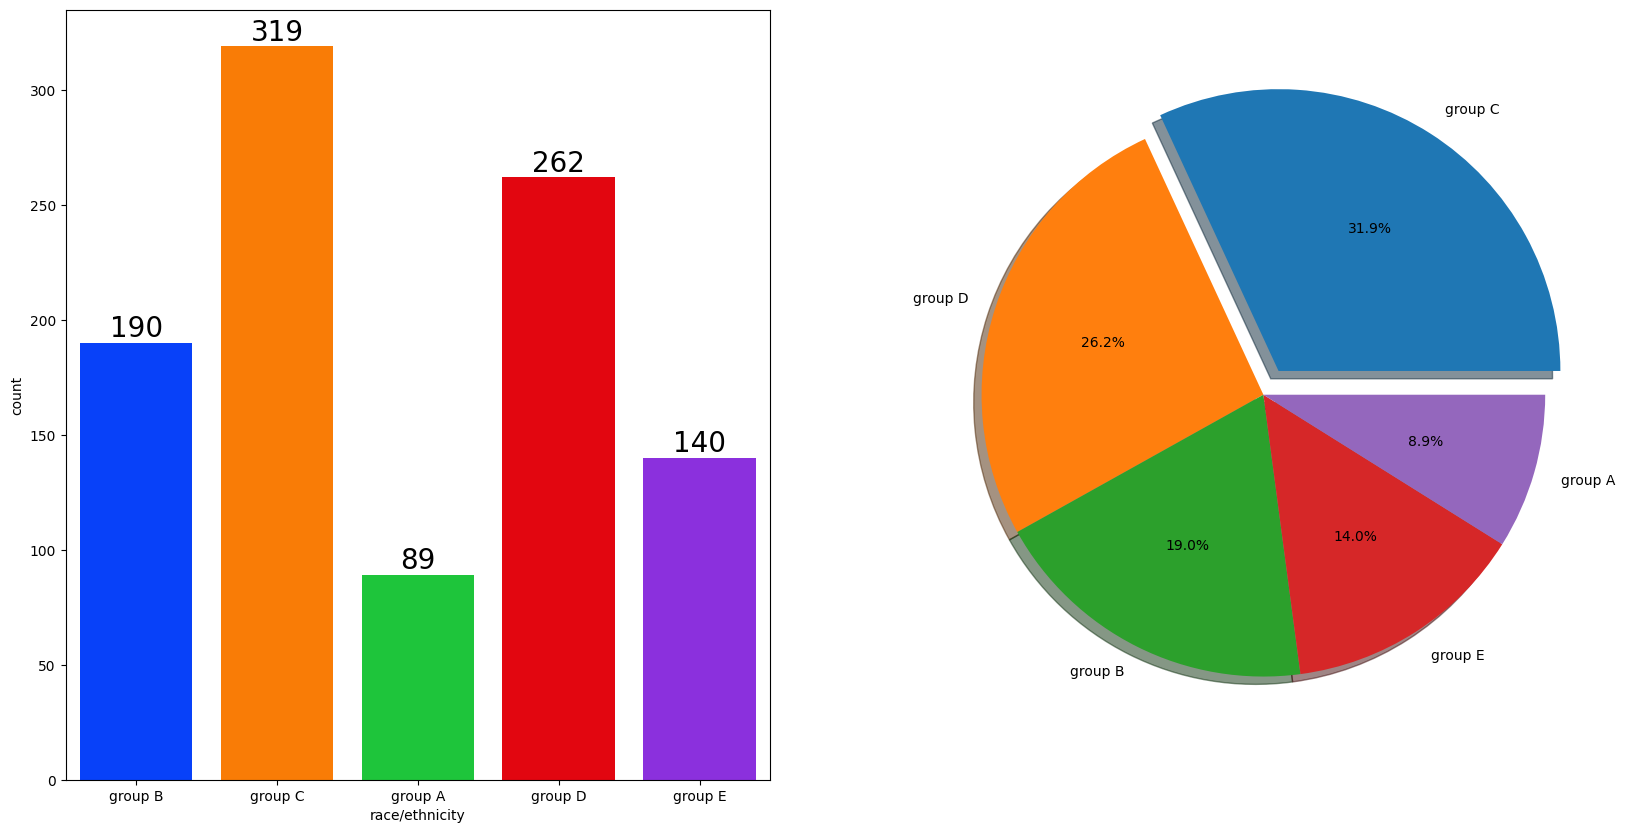

In [28]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['race/ethnicity'], data=df,
              palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index,
        explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)
plt.show()

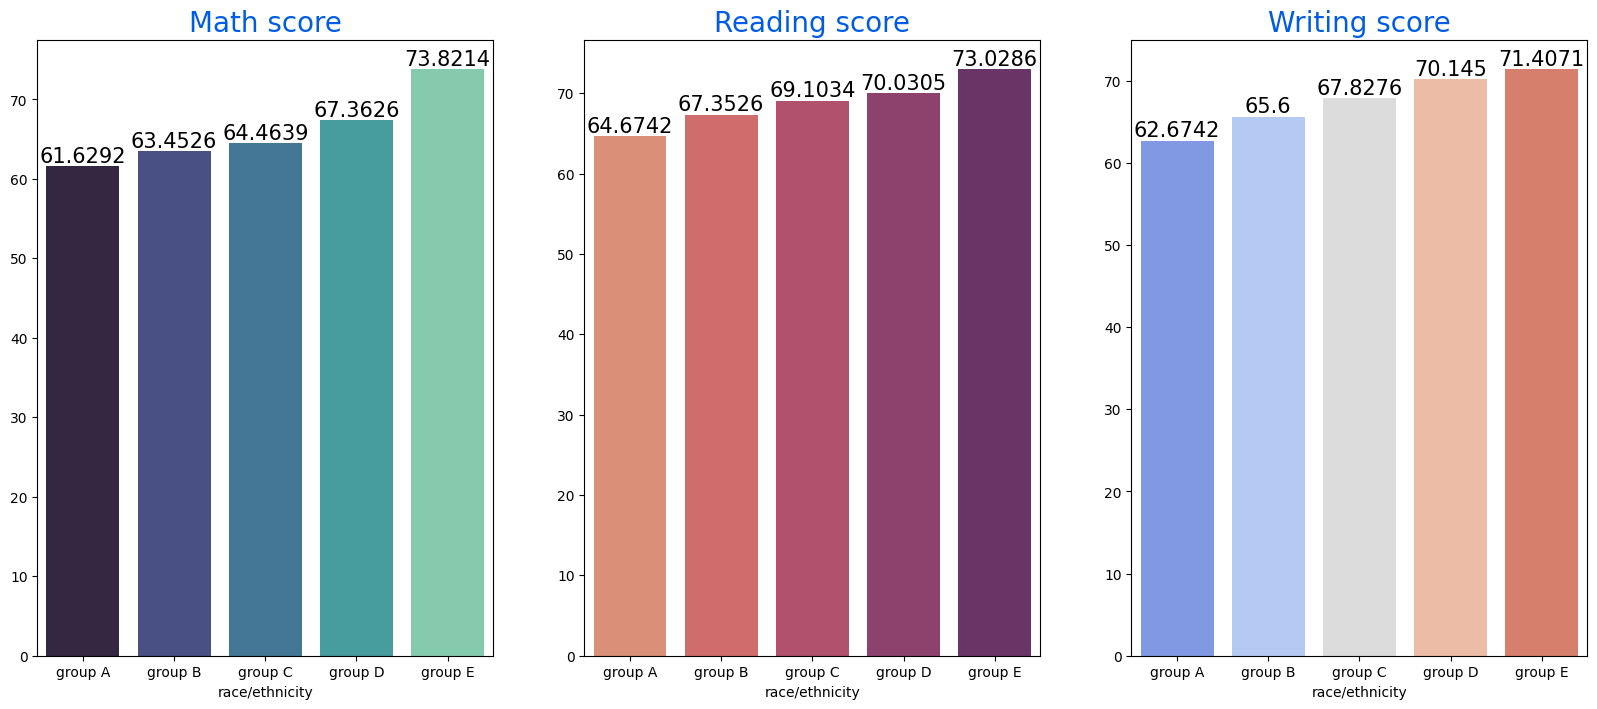

In [29]:
group_data2 = df.groupby('race/ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.barplot(x=group_data2['math score'].mean().index, y=group_data2['math score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=group_data2['reading score'].mean().index,y=group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_data2['writing score'].mean().index,y=group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

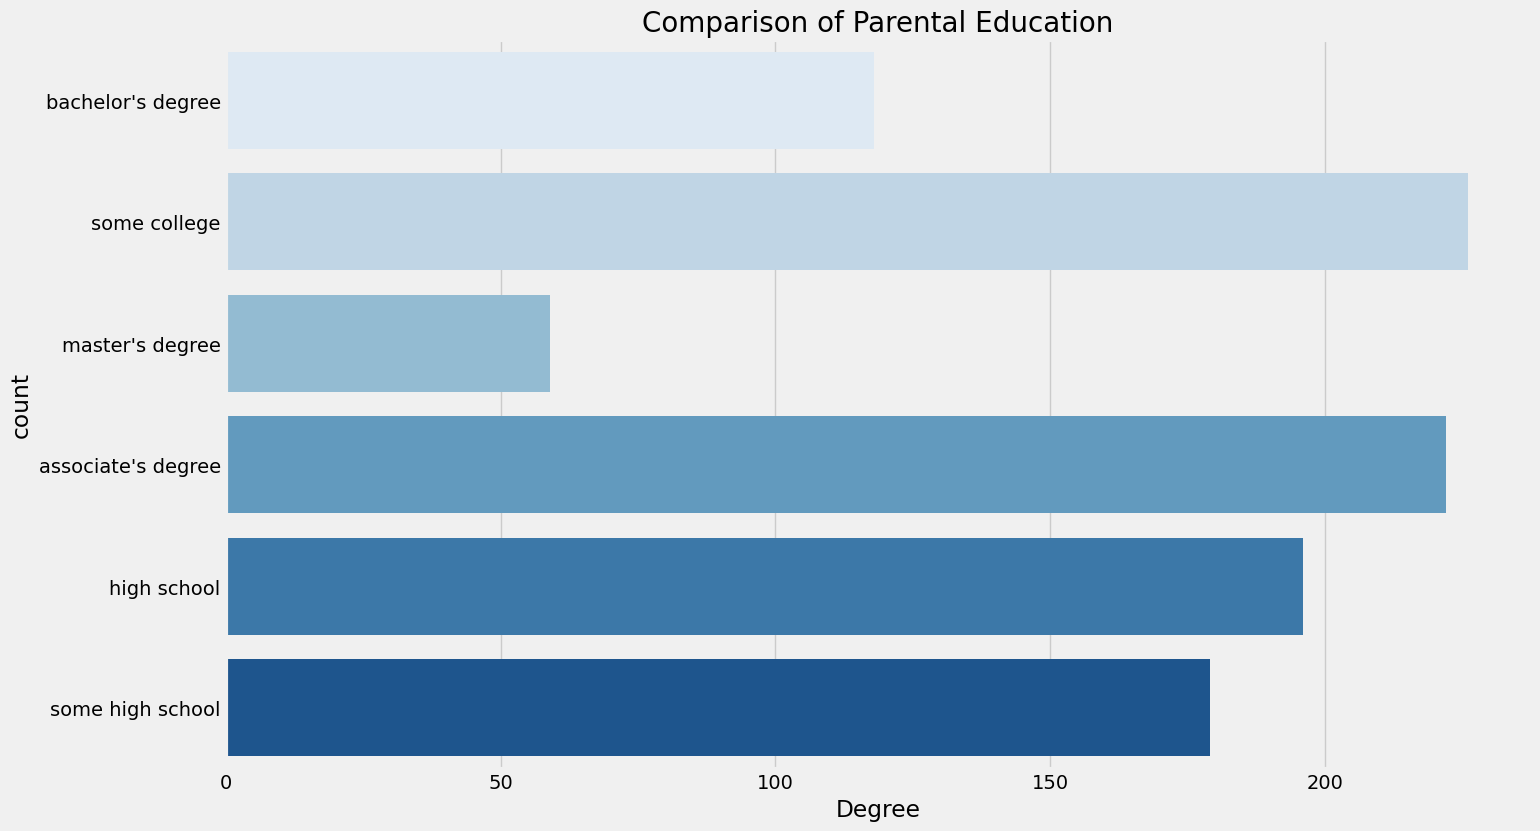

In [30]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()  

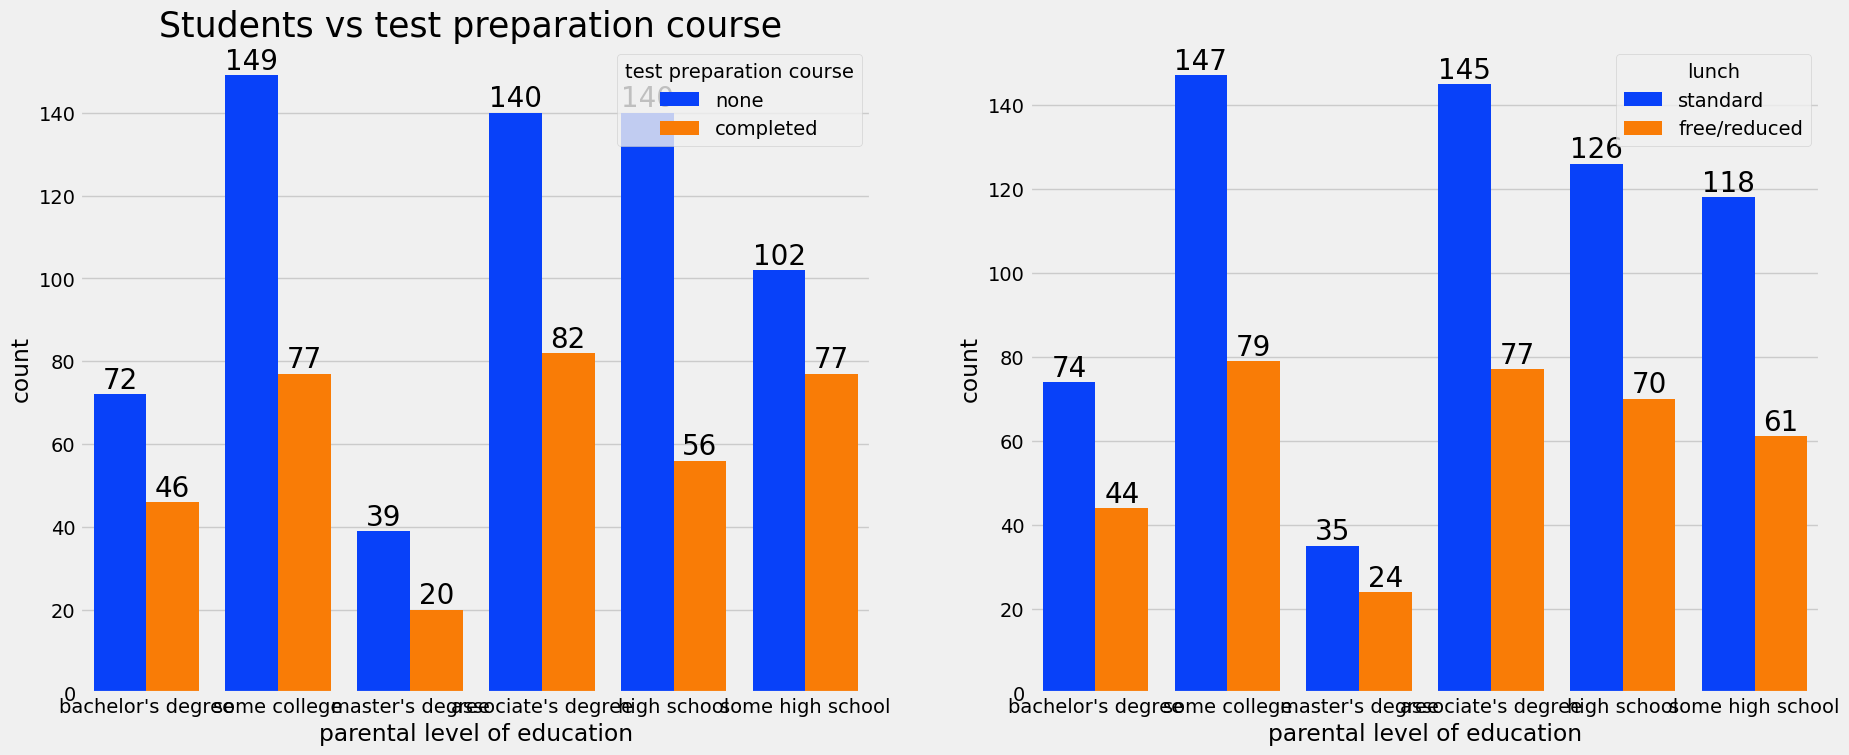

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

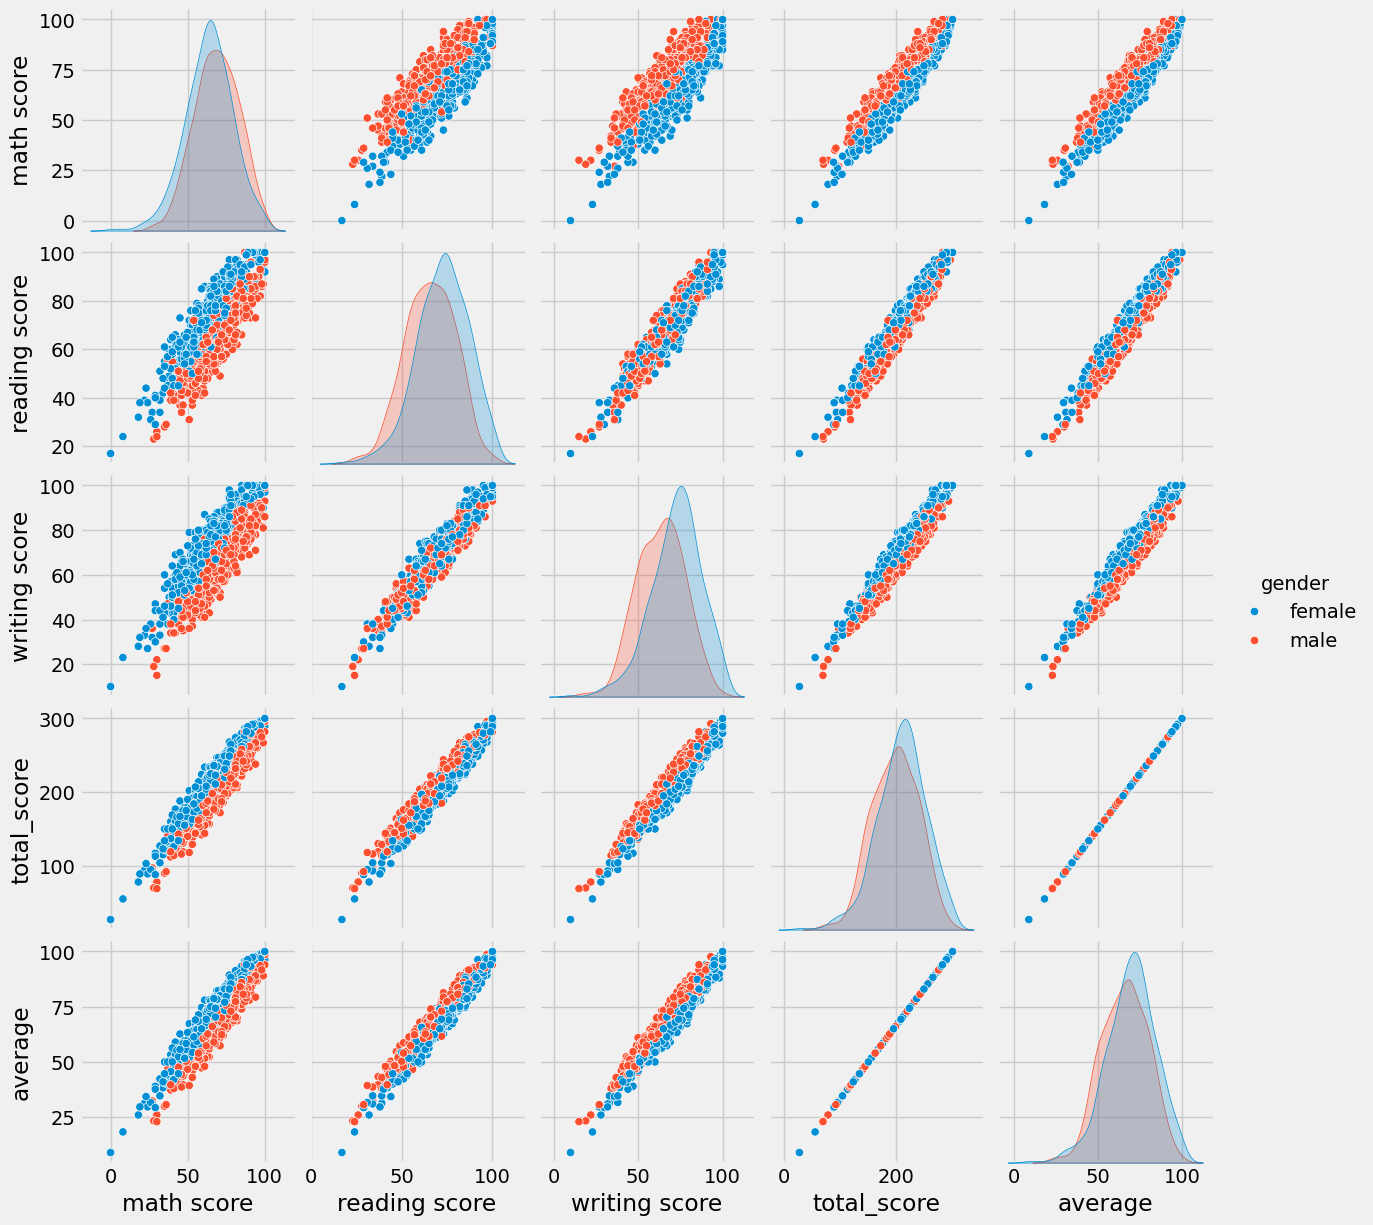

In [32]:
sns.pairplot(df, hue='gender')
plt.show()

### Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.